In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
#change directory
cd /content/drive/My Drive

/content/drive/My Drive


# Import data


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import statistics
import math
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [25]:
url ='mentalHealthAllData.csv'
df = pd.read_csv(url,encoding='latin1')     #read data from the link
length_of_data = len(df)
print("data length:" + str(length_of_data))     
print("dimention of data: ",df.shape)
#shuffle all data
df = df.sample(frac=1).reset_index(drop=True)   # or df.sample(frac=1)
df.head()

data length:164
dimention of data:  (164, 12)


,Student id,DI,PSS,GSE,Ex,A,C,E,O,CGPA,Facebook_Data,Unnamed: 11
0,11152048,25,36,36,7.0,6.0,4.5,6.5,7.0,2.90,feeling this motion every single moments\ningr...,NaN
1,11161126,28,24,36,3.0,7.0,3.5,4.0,5.5,3.00,a w e s o am e\n????\n??\nwow\n??\n??\nholy sh...,NaN
2,11151122,28,24,31,6.5,3.0,5.0,3.5,5.5,3.07,NaN,NaN
3,11151239,32,31,28,5.0,4.0,5.0,5.0,3.0,2.74,thank you azim uddin chowdhury bhai and sharmi...,NaN
4,11152086,36,23,29,6.5,7.0,4.5,6.0,5.5,2.21,!!\na+ !! a+ (golden) a+ !! !! ! !!\naft...,NaN


# remove those row which cgpa is null

In [26]:
df = df[pd.notnull(df['CGPA'])]
df.shape

(162, 12)

**data choose (3<= GPA<=3.7)**

In [0]:
#GPA=df.iloc[:,9]   # select CGPA column
#df = df.loc[GPA >= 3]
#df = df.loc[GPA <= 3.7]
#df.head()

# Find the correlation with gpa  (find R & P)

In [29]:
from scipy import stats
correlation =[]

GPA = df['CGPA']
colName =['DI','PSS','GSE','Ex','A','C','E','O']

for i in colName:
  r, p = stats.pearsonr(df[i],GPA)
  a="significant"
  b="significant"
  c="significant"
  if p<.01:
    ;
  elif p<.05:
    a="not significant"
  elif p<.10:
    a="not significant"
    b="not significant"
  else:
    a="not significant"
    b="not significant"
    c="not significant"
    
  correlation.append([r,p,a,b,c])
#Convert list of tuples to dataframe and set column names and indexes
dfObj = pd.DataFrame(correlation, columns = ['R','P','p < .01','p < .05','p < .10'], index=colName) 
dfObj

,R,P,p < .01,p < .05,p < .10
DI,-0.046429,0.557418,not significant,not significant,not significant
PSS,-0.090582,0.251651,not significant,not significant,not significant
GSE,0.158889,0.043434,not significant,significant,significant
Ex,-0.134029,0.089059,not significant,not significant,significant
A,-0.106565,0.177112,not significant,not significant,not significant
C,-0.019112,0.809253,not significant,not significant,not significant
E,-0.130306,0.098385,not significant,not significant,significant
O,0.055306,0.484546,not significant,not significant,not significant


# preprocess(Normalize DI,PSS,GSE,EX,A,C,E,O) for  all data,  


In [32]:
cols_to_norm = ['DI','PSS','GSE','Ex','A','C','E','O']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,Student id,DI,PSS,GSE,Ex,A,C,E,O,CGPA,Facebook_Data,Unnamed: 11
0,11152048,0.311111,0.621622,0.84,1.000000,0.007457,0.583333,0.916667,0.666667,2.90,feeling this motion every single moments\ningr...,NaN
1,11161126,0.377778,0.297297,0.84,0.333333,0.009114,0.416667,0.500000,0.500000,3.00,a w e s o am e\n????\n??\nwow\n??\n??\nholy sh...,NaN
2,11151122,0.377778,0.297297,0.64,0.916667,0.002486,0.666667,0.416667,0.500000,3.07,NaN,NaN
3,11151239,0.466667,0.486486,0.52,0.666667,0.004143,0.666667,0.666667,0.222222,2.74,thank you azim uddin chowdhury bhai and sharmi...,NaN
4,11152086,0.555556,0.270270,0.56,0.916667,0.009114,0.583333,0.833333,0.500000,2.21,!!\na+ !! a+ (golden) a+ !! !! ! !!\naft...,NaN


# devide into 30%-70% 


In [34]:
thirty_percent = round(.3 *length_of_data)
seventy_percent = length_of_data - thirty_percent

thirty_percent_data = df[0:thirty_percent][['DI','PSS','GSE','Ex','A','C','E','O','CGPA']]
seventy_percent_data = df[thirty_percent:][['DI','PSS','GSE','Ex','A','C','E','O','CGPA']]

print(len(thirty_percent_data))
thirty_percent_data.head()


49


,DI,PSS,GSE,Ex,A,C,E,O,CGPA
0,0.311111,0.621622,0.84,1.000000,0.007457,0.583333,0.916667,0.666667,2.90
1,0.377778,0.297297,0.84,0.333333,0.009114,0.416667,0.500000,0.500000,3.00
2,0.377778,0.297297,0.64,0.916667,0.002486,0.666667,0.416667,0.500000,3.07
3,0.466667,0.486486,0.52,0.666667,0.004143,0.666667,0.666667,0.222222,2.74
4,0.555556,0.270270,0.56,0.916667,0.009114,0.583333,0.833333,0.500000,2.21


# Find Median and classify gpa on 30% data  (0-> Low, 1-> high)









In [36]:
gpa_median_value = statistics.median(map(float, thirty_percent_data['CGPA']))
print("median value of cgpa: " + str(gpa_median_value))
thirty_percent_data['CGPA_Class'] = thirty_percent_data['CGPA'].apply(lambda x: 1 if x>=gpa_median_value else 0)

gpa_median_value2 = statistics.median(map(float, seventy_percent_data['CGPA']))
print("median value of cgpa: " + str(gpa_median_value2))
seventy_percent_data['CGPA_Class'] = seventy_percent_data['CGPA'].apply(lambda x: 1 if x>=gpa_median_value else 0)

#count how many high and low class
count_high = (thirty_percent_data[['CGPA_Class']] == 1).sum(axis=0)
count_low = len(thirty_percent_data) - count_high
print("# of class belongs to High:" + str(count_high))
print("# of class belongs to low:" + str(count_low))

thirty_percent_data.head()

median value of cgpa: 3.0
median value of cgpa: 2.9
# of class belongs to High:CGPA_Class    25
dtype: int64
# of class belongs to low:CGPA_Class    24
dtype: int64


,DI,PSS,GSE,Ex,A,C,E,O,CGPA,CGPA_Class
0,0.311111,0.621622,0.84,1.000000,0.007457,0.583333,0.916667,0.666667,2.90,0
1,0.377778,0.297297,0.84,0.333333,0.009114,0.416667,0.500000,0.500000,3.00,1
2,0.377778,0.297297,0.64,0.916667,0.002486,0.666667,0.416667,0.500000,3.07,1
3,0.466667,0.486486,0.52,0.666667,0.004143,0.666667,0.666667,0.222222,2.74,0
4,0.555556,0.270270,0.56,0.916667,0.009114,0.583333,0.833333,0.500000,2.21,0


# Differnt functions for different algorithms and there accuracy test

**Adaboost classifier function**

In [0]:
def AdaboostClassifier(X_train, y_train, X_test, y_test, n_estimators,base_estimator,learning_rate):
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn import metrics
  
  abc = AdaBoostClassifier(n_estimators=n_estimators, base_estimator=base_estimator, learning_rate=learning_rate)
  model = abc.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return y_pred, accuracy
  

**logistic regression function**

In [0]:
def logisitc_regression(X_train,y_train,X_test,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score 
  logit = LogisticRegression()
  logit.fit(X_train, y_train)
  y_hat = logit.predict(X_test)
  accuracy = accuracy_score(y_test,y_hat)
  parameters = logit.coef_
  return y_hat,accuracy,parameters

**Gradient Boosting Classifier**

In [0]:
def GradientBoostingClassifier(X_train,y_train,X_test,y_test,n_estimators,learning_rate,max_depth,random_state):
  from sklearn.ensemble import GradientBoostingClassifier
  clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,max_depth=max_depth, random_state=random_state).fit(X_train, y_train)
  accuracy =clf.score(X_test, y_test)
  y_hat = clf.predict(X_test)
  return y_hat,accuracy

**linear regression function**

In [0]:
def linear_Regression(X_train,y_train,X_test,y_test):
  from sklearn.linear_model import LinearRegression
  linear_regressor_m = LinearRegression()  # create object for the class
  linear_regressor_m.fit(X_train,y_train)  # perform linear regression
  y_hat = linear_regressor_m.predict(X_test)  # make predictions  
  coef = linear_regressor_m.coef_
  intercept=linear_regressor_m.intercept_
  return y_hat,coef,intercept


def plot_actual_gpa_predicted_gpa(y_test, y_hat,title):
  plt.plot(y_test, y_hat, '.')
  plt.xlabel("Actual GPA")
  plt.ylabel("Predicted GPA")
  plt.title(title)
  # plot a line, a perfit predict would all fall on this line
  x = np.linspace(0, 4, 10)
  y = x
  plt.plot(x, y)
  plt.show()
  #error calculation
  error = (sum(np.sqrt((y_test-y_hat)**2))/len(seventy_percent_data))*100
  return error

**Gausian_process_regression**

In [0]:
def gausian_process_regression(X_train,y_train,X_test,y_test,kernel,n_restarts_optimizer,alpha,random_state,normalize_y,copy_X_train):
  from sklearn import gaussian_process
  gp = gaussian_process.GaussianProcessRegressor(kernel=kernel,copy_X_train=copy_X_train, n_restarts_optimizer=n_restarts_optimizer, alpha=alpha,random_state=random_state, normalize_y=normalize_y,optimizer='fmin_l_bfgs_b')
  gp.fit(X_train, y_train)
  y_pred, sigma = gp.predict(X_test, return_std=True)
  MSE = ((y_pred-y_test)**2).mean()
  return y_pred,MSE

**confussion matrix  ploting function**

In [0]:
def confusion_matrix(y,y_hat,name):
  ###Confusion matrix with sklearn
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cnf_matrix_m=confusion_matrix(y, y_hat)

  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix_m), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  #plt.tight_layout()
  plt.title(name, y=1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

**Ploting function for high and low classification**

In [0]:
def plot(data,x1_index,x2_index,y_index,x_label,y_label,title):
  X=data.iloc[:,[x1_index,x2_index]]  #select features column
  y=data.iloc[:,y_index]   # select label column

  # filter out the applicants that got high cgpa
  high = data.loc[y == 1]
  # filter out the applicants that got low cgpa
  low = data.loc[y == 0]


  # plots
  plt.scatter(high.iloc[:, 0], high.iloc[:, 1], s=20, label='High')
  plt.scatter(low.iloc[:, 0], low.iloc[:, 1], s=20, label='Low')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()
  plt.show()
  return

**ROC curve and AUC value function**

In [0]:
def roc_curve(y_hat,y,name):
  from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
  ##Computing false and true positive rates
  fpr, tpr,_=roc_curve(y_hat,y,drop_intermediate=False)

  plt.figure()
  ##Adding the ROC
  plt.plot(fpr, tpr, color='red',lw=2, label=name)
  ##Random FPR and TPR
  plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
  ##Title and label
  plt.xlabel('False Prediction Rate')
  plt.ylabel('True Prediction Rate')
  plt.title(name)
  plt.show()
  auc = roc_auc_score(y_hat,y)
  return auc

# applying Adaboost,Logistic regression classification algorithms on 30% data for mental model (DI, PSS) and find W1

**calling plot function  for DI & PSS**

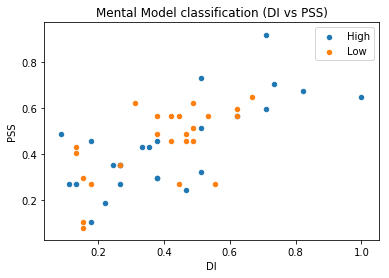

In [46]:
#DATA SPLIT INTO X, Y FROM 30%
X_m=thirty_percent_data.iloc[:,:2]
y_m=thirty_percent_data.iloc[:,9]

X_test_s=seventy_percent_data.iloc[:,:2]
y_test_s=seventy_percent_data.iloc[:,9]

plot(thirty_percent_data,0,1,9,"DI","PSS","Mental Model classification (DI vs PSS)")

 **Calling Adaboost Classifier and Logistic Regression and for mental model & compare accuracy**

Adaboost accuracy:  0.9591836734693877
GradientBoostingClassifier accuracy:  0.8571428571428571
Logistic accuracy:  0.4897959183673469 



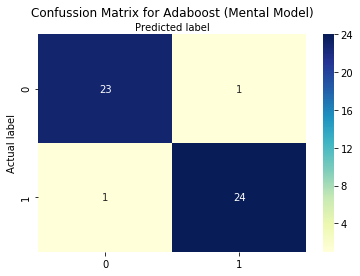

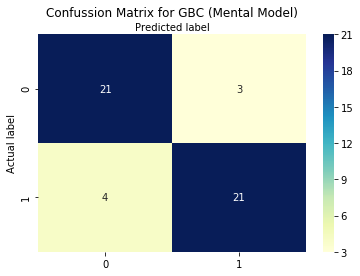

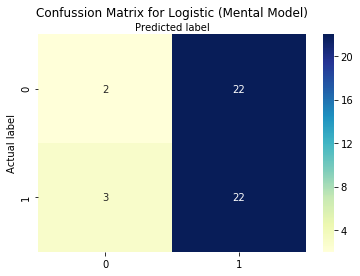

In [47]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 50, max_features = 2, class_weight = "balanced", max_depth = None,presort =True)

#calling different classifier model
y_pred_m_ada, accuracy_m_ada = AdaboostClassifier(X_m, y_m,X_m, y_m,n_estimators=50,base_estimator=DTC,learning_rate=1)

y_pred_m_gbc,accuracy_m_gbc = GradientBoostingClassifier(X_m,y_m,X_m,y_m,n_estimators=100,learning_rate=.1,max_depth=1,random_state=None)

y_pred_m_logi, accuracy_m_logi ,pramiter_m_logi =logisitc_regression(X_m, y_m,X_m, y_m)


print("Adaboost accuracy: " ,accuracy_m_ada)
print("GradientBoostingClassifier accuracy: " ,accuracy_m_gbc)
print("Logistic accuracy: " , accuracy_m_logi,"\n")


confusion_matrix(y_m,y_pred_m_ada,"Confussion Matrix for Adaboost (Mental Model)") 
confusion_matrix(y_m,y_pred_m_gbc,"Confussion Matrix for GBC (Mental Model)") 
confusion_matrix(y_m,y_pred_m_logi,"Confussion Matrix for Logistic (Mental Model)")

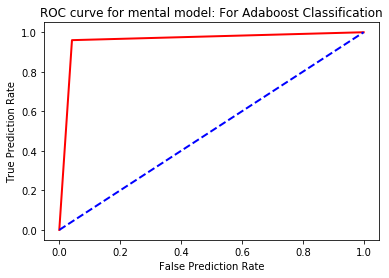

AUC for adaboost: 0.9591666666666667




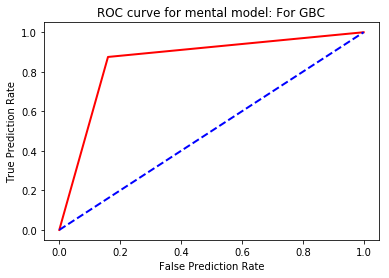

AUC for logistic: 0.8574999999999999




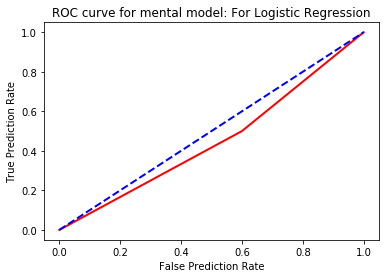

AUC for logistic: 0.45000000000000007


In [48]:
auc_m_ada = roc_curve(y_pred_m_ada,y_m,"ROC curve for mental model: For Adaboost Classification") 
print("AUC for adaboost: "+str(auc_m_ada))
print("\n")

auc_m_gbc = roc_curve(y_pred_m_gbc,y_m,"ROC curve for mental model: For GBC")
print("AUC for logistic: "+str(auc_m_gbc))
print("\n")

auc_m_log = roc_curve(y_pred_m_logi,y_m,"ROC curve for mental model: For Logistic Regression")
print("AUC for logistic: "+str(auc_m_log))
W1_ada = auc_m_ada
W1_log = auc_m_log
W1_gbc = auc_m_gbc

# applying Adaboost,Logistic regression classification algorithms on 30% data for psycological model (GSE, Ex,E) and find W2

**calling plot function for GSE, Ex & E**

In [0]:
#GSE-2	Ex-3	A-4	C-5	E-6	O-7	CGPA-8	GPA_Class-9  
#DATA SPLIT INTO X, Y FROM 30%
X_p=thirty_percent_data.iloc[:,[2,3,6]]
y_p=thirty_percent_data.iloc[:,9]

X_test_s=seventy_percent_data.iloc[:,[2,3,6]]
y_test_s=seventy_percent_data.iloc[:,9]

#plot(thirty_percent_data,2,6,9,"GSE","","Psycological Model classification (DI vs PSS)")

 **Calling Adaboost Classifier and Logistic Regression and for psycological model & compare accuracy**

Adaboost accuracy:  0.9591836734693877
GradientBoostingClassifier accuracy:  0.7551020408163265
Logistic accuracy:  0.6326530612244898 



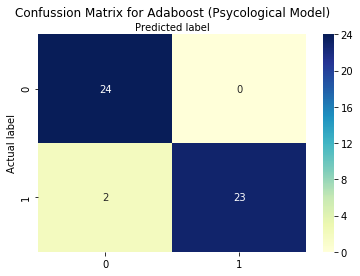

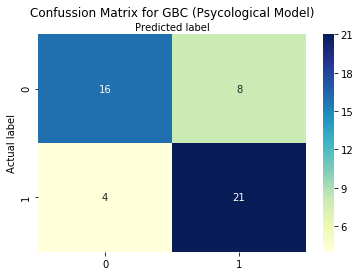

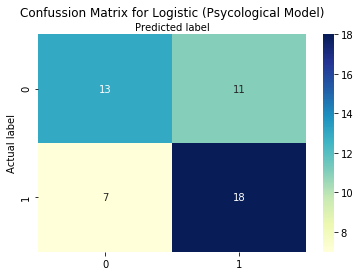

In [52]:

DTC = DecisionTreeClassifier(random_state = 50, max_features = 2, class_weight = "balanced", max_depth = None,presort =True)

y_pred_p_ada, accuracy_p_ada = AdaboostClassifier(X_p, y_p, X_p, y_p, n_estimators=50,base_estimator=DTC,learning_rate=1)

y_pred_p_gbc,accuracy_p_gbc = GradientBoostingClassifier(X_p,y_p,X_p,y_p,n_estimators=100,learning_rate=.1,max_depth=1,random_state=None)

y_pred_p_logi, accuracy_p_logi ,pramiter_p_logi =logisitc_regression(X_p, y_p, X_p, y_p)

print("Adaboost accuracy: " ,accuracy_p_ada)
print("GradientBoostingClassifier accuracy: " ,accuracy_p_gbc)
print("Logistic accuracy: " , accuracy_p_logi,"\n")


confusion_matrix(y_p,y_pred_p_ada,"Confussion Matrix for Adaboost (Psycological Model)") 
confusion_matrix(y_p,y_pred_p_gbc,"Confussion Matrix for GBC (Psycological Model)") 
confusion_matrix(y_p,y_pred_p_logi,"Confussion Matrix for Logistic (Psycological Model)")

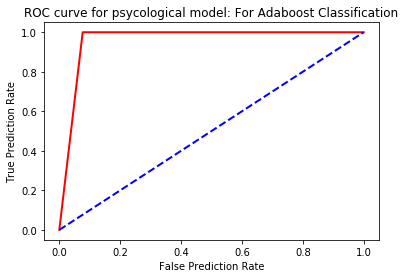

AUC for adaboost:  0.9615384615384616




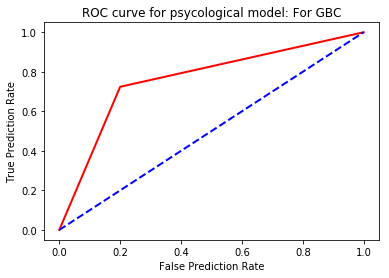

AUC for GBC:  0.7620689655172415




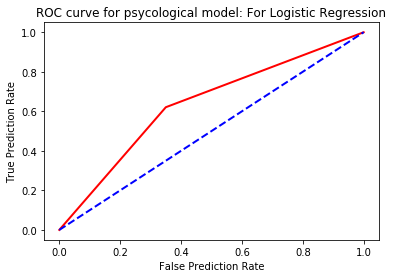

AUC for logistic:  0.6353448275862068


In [53]:
auc_p_ada = roc_curve(y_pred_p_ada,y_p,"ROC curve for psycological model: For Adaboost Classification") 
print("AUC for adaboost: ", auc_p_ada)
print("\n")

auc_p_gbc = roc_curve(y_pred_p_gbc,y_p,"ROC curve for psycological model: For GBC")
print("AUC for GBC: ", auc_p_gbc)
print("\n")

auc_p_log = roc_curve(y_pred_p_logi,y_p,"ROC curve for psycological model: For Logistic Regression")
print("AUC for logistic: ",auc_p_log)
W2_ada = auc_p_ada
W2_log = auc_p_log
W2_gbc = auc_p_gbc

# perform Linear regression on rest 70% data for Mental model (DI, PSS) and find Mi

In [0]:
seventy_percent_data.head()
X_m_seventy=seventy_percent_data[['DI','PSS']]  
y_m_seventy=seventy_percent_data.iloc[:,8] 

x_test = thirty_percent_data[['DI','PSS']] 
y_test = thirty_percent_data.iloc[:,8] 

mean square error 0.047709027767648


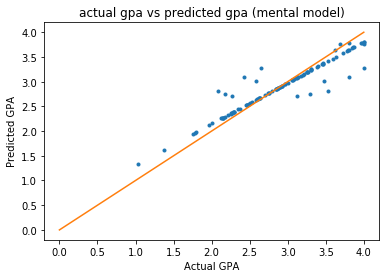

error rate for Mental model (Gausian Process Regression) : 13.59


In [55]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,ExpSineSquared,RationalQuadratic,RBF,ConstantKernel,Matern

kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=0)
#kernel = gp.kernels.ConstantKernel(1, (0.1, 1000)) * gp.kernels.RBF(10.0, (0.0001, 1000))
#kernel = DotProduct() + WhiteKernel()
#kernel = DotProduct() +ConstantKernel() + Matern(length_scale=0, nu=2/3) + WhiteKernel()
#kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))

y_hat_m_gaus,MSE_m_gaus = gausian_process_regression(X_m_seventy,y_m_seventy,X_m_seventy,y_m_seventy,kernel,n_restarts_optimizer=0,alpha=0.001,random_state=None,normalize_y=False,copy_X_train=True)

print("mean square error",MSE_m_gaus)

error_m_gaus = plot_actual_gpa_predicted_gpa(y_m_seventy,y_hat_m_gaus,"actual gpa vs predicted gpa (mental model)")
print("error rate for Mental model (Gausian Process Regression) :", '%.2f' %error_m_gaus)

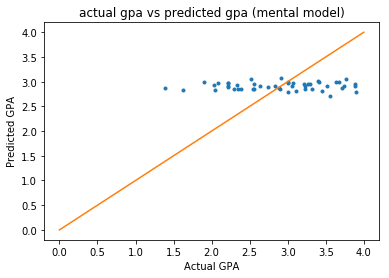

error rate for Mental model (linear regression) : 23.10


In [56]:
y_hat_m_lin,coef_m_lin,intercept_m_lin =linear_Regression(X_m_seventy,y_m_seventy,x_test,y_test)
error_m_lin = plot_actual_gpa_predicted_gpa(y_test,y_hat_m_lin,"actual gpa vs predicted gpa (mental model)")
print("error rate for Mental model (linear regression) :", '%.2f' %error_m_lin)

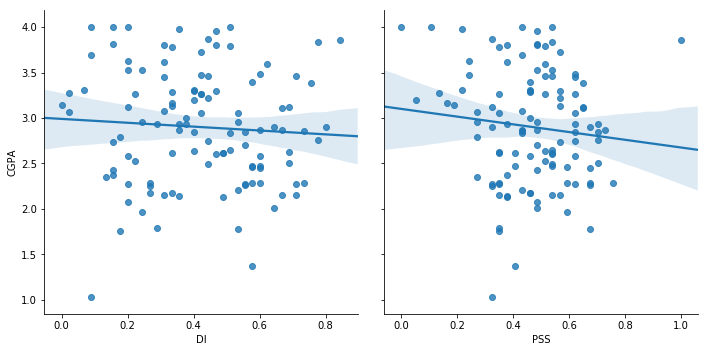

In [58]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(seventy_percent_data, x_vars=['DI','PSS'], y_vars='CGPA', size=5, aspect=1, kind='reg')

# perform Linear regression on rest 70% data for Psycology (GSE,Ex,E) and find Mp

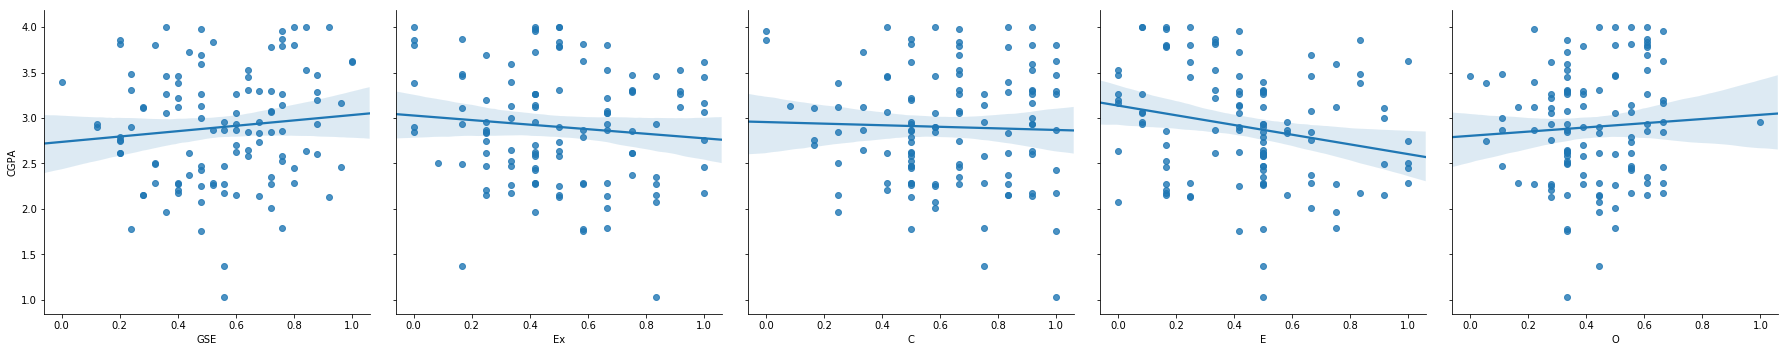

In [60]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(seventy_percent_data, x_vars=['GSE','Ex','C','E','O'], y_vars='CGPA', size=5, aspect=1, kind='reg')

mean square error 0.015369679941573


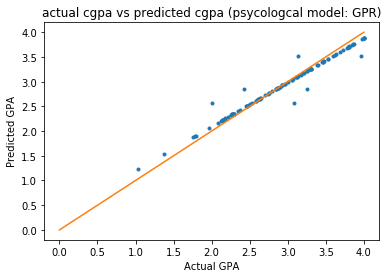

error rate for Mental model (Gausian Process Regression) : 7.61


In [61]:
X_p_seventy=seventy_percent_data[['GSE','Ex','E']]  
y_p_seventy=seventy_percent_data.iloc[:,8]  

x_test = thirty_percent_data[['GSE','Ex','E']] 
y_test = thirty_percent_data.iloc[:,8] 

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,ExpSineSquared,RationalQuadratic,RBF,ConstantKernel,Matern

kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=0)
#kernel = gp.kernels.ConstantKernel(1, (0.1, 1000)) * gp.kernels.RBF(10.0, (0.0001, 1000))
#kernel = DotProduct() + WhiteKernel()
#kernel = DotProduct() +ConstantKernel() + Matern(length_scale=0, nu=2/3) + WhiteKernel()
#kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))

y_hat_p_gaus,MSE_p_gaus = gausian_process_regression(X_p_seventy,y_p_seventy,X_p_seventy,y_p_seventy,kernel,n_restarts_optimizer=0,alpha=0.001,random_state=None,normalize_y=False,copy_X_train=True)

print("mean square error",MSE_p_gaus)

error_m_gaus = plot_actual_gpa_predicted_gpa(y_p_seventy,y_hat_p_gaus,"actual cgpa vs predicted cgpa (psycologcal model: GPR)")
print("error rate for Mental model (Gausian Process Regression) :", '%.2f' %error_m_gaus)



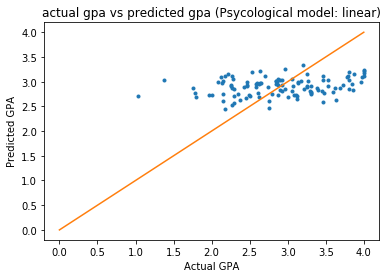

error rate for Psycological model (linear regression) : 50.28


In [62]:

y_hat_p_lin,coef_p_lin,intercept_p_lin =linear_Regression(X_p_seventy,y_p_seventy,X_p_seventy,y_p_seventy)
error_p_lin = plot_actual_gpa_predicted_gpa(y_p_seventy,y_hat_p_lin,"actual gpa vs predicted gpa (Psycological model: linear)")
print("error rate for Psycological model (linear regression) :", '%.2f' %error_p_lin)


# Yi = (W1*Mi + W2*Pi)/ W1+W2

In [0]:
M= y_hat_m_gaus
P= y_hat_p_gaus
a=M*W1_ada 
b=P*W2_ada
c = W1_ada+W2_ada
Y= (a+b)/c


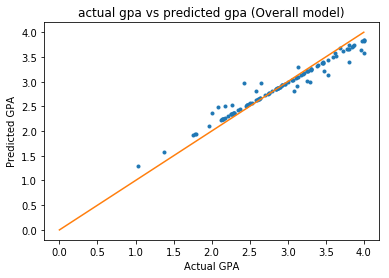

error rate for Mental model : 10.49


In [64]:
# plot prediction and actual data
error_of_model = plot_actual_gpa_predicted_gpa(y_p_seventy,Y,"actual gpa vs predicted gpa (Overall model)")
print("error rate for Mental model :" ,'%.2f' %error_of_model)